In [1]:
# Olusina wrote the code to create the database and wrote code for a few queries
# Patrick wrote code for a few queries
# Joseph wrote code for a few queries

import sqlite3
import pandas as pd
import locale
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Olusina 

# Establishes a db connection
conn = sqlite3.connect('retailProject.db')

In [3]:
# Olusina

# cursor() creates a Cursor
c = conn.cursor()

In [4]:
# Olusina 

filename = input("Enter file name: ")
data = pd.read_csv(filename, encoding="ANSI")
data.to_sql('data', conn, if_exists='append', index=False)

Enter file name: Online_Retail.csv


In [5]:
# Olusina 

# execute() execute SQL statement and print
header = True  # Set to True to include header
limit = 5  # Number of rows to limit the output

result = c.execute("SELECT * FROM data")
rows = result.fetchall()

if header:
    # Get column names
    column_names = [description[0] for description in result.description]

    # Create a dataframe with column names
    df = pd.DataFrame(rows, columns=column_names)
else:
    # Create a dataframe without column names
    df = pd.DataFrame(rows)

# Limit the output to the specified number of rows
df = df.head(limit)

print(df)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


In [6]:
# Olusina

# Delete the existing transactions table if it exists
c.execute("DROP TABLE IF EXISTS transactions")

In [7]:
# Olusina 

# Create a transactions table
c.execute('''CREATE TABLE transactions (
    InvoiceNo INT PRIMARY KEY NOT NULL,
    StockCode CHAR(50) NOT NULL,
    Quantity TEXT,
    InvoiceDate DATE,
    CustomerID INT 
)''')

In [8]:
# Olusina

# Delete the existing transactions table if it exists
c.execute("DROP TABLE IF EXISTS product")

In [9]:
# Olusina 

# Create a product table
c.execute('''CREATE TABLE product (
    StockCode CHAR(50) PRIMARY KEY NOT NULL,
    Description TEXT,
    UnitPrice DECIMAL(10, 2) 
)''')

In [10]:
# Olusina

# Delete the existing transactions table if it exists
c.execute("DROP TABLE IF EXISTS customer")

In [11]:
# Olusina 

# Create a customer table
c.execute('''CREATE TABLE customer (
    CustomerID INT PRIMARY KEY,
    Country CHAR(50)    
)''')

In [12]:
# Olusina

# Extract unique transactions from the original table
c.execute('''INSERT OR IGNORE INTO transactions (InvoiceNo, StockCode, Quantity, InvoiceDate, CustomerID)
                    SELECT DISTINCT InvoiceNo, StockCode, Quantity, InvoiceDate, CustomerID FROM data''')

In [13]:
# Olusina

# Extract unique product from the original table
c.execute('''INSERT OR IGNORE INTO product (StockCode, Description,  UnitPrice)
                    SELECT DISTINCT StockCode, Description, UnitPrice FROM data''')

In [14]:
# Olusina

# Extract unique customer from the original table
c.execute('''INSERT OR IGNORE INTO customer (CustomerID, Country)
                    SELECT DISTINCT CustomerID, Country FROM data''')

In [15]:
# Olusina

# Fetch the first 5 rows from the transactions table
c.execute('''SELECT * FROM transactions LIMIT 5''')

# Get the column names
columns = [description[0] for description in c.description]

# Fetch all the results
results = c.fetchall()

# Create a DataFrame with the results and column names
df = pd.DataFrame(results, columns=columns)

# Print the DataFrame
print(df)

   InvoiceNo StockCode Quantity   InvoiceDate  CustomerID
0     536365    85123A        6  12/1/10 8:26       17850
1     536366     22633        6  12/1/10 8:28       17850
2     536367     84879       32  12/1/10 8:34       13047
3     536368     22960        6  12/1/10 8:34       13047
4     536369     21756        3  12/1/10 8:35       13047


In [16]:
# Olusina

# Set the locale for currency formatting
locale.setlocale(locale.LC_ALL, '')

'English_United States.1252'

In [17]:
# Olusina

# Fetch the first 5 rows from the product table
c.execute('''SELECT * FROM product LIMIT 5''')

# Get the column names
columns = [description[0] for description in c.description]

# Fetch all the results
results = c.fetchall()

# Create a DataFrame with the results and column names
df = pd.DataFrame(results, columns=columns)

df['UnitPrice'] = df['UnitPrice'].map(locale.currency)
# Print the DataFrame
print(df)

  StockCode                          Description UnitPrice
0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     $2.55
1     71053                  WHITE METAL LANTERN     $3.39
2    84406B       CREAM CUPID HEARTS COAT HANGER     $2.75
3    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     $3.39
4    84029E       RED WOOLLY HOTTIE WHITE HEART.     $3.39


In [18]:
# Olusina

# Fetch the first 5 rows from the customer table
c.execute('''SELECT * FROM customer LIMIT 5''')

# Get the column names
columns = [description[0] for description in c.description]

# Fetch all the results
results = c.fetchall()

# Create a DataFrame with the results and column names
df = pd.DataFrame(results, columns=columns)

# Print the DataFrame
print(df)

   CustomerID         Country
0       17850  United Kingdom
1       13047  United Kingdom
2       12583          France
3       13748  United Kingdom
4       15100  United Kingdom


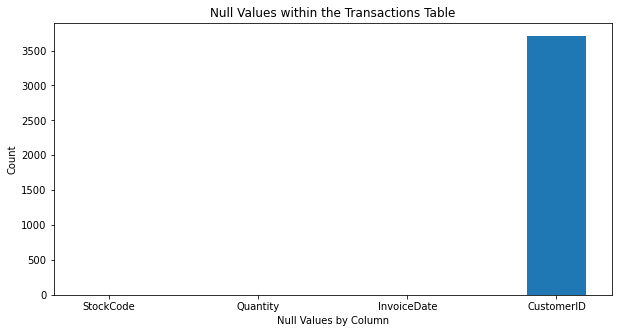

In [19]:
# Patrick 

# Execute the query to count nulls in each column in the transactions table
query = '''
    SELECT
        SUM(CASE WHEN StockCode IS NULL THEN 1 ELSE 0 END) AS StockCode_Nulls,
        SUM(CASE WHEN Quantity IS NULL THEN 1 ELSE 0 END) AS Quantity_Nulls,
        SUM(CASE WHEN InvoiceDate IS NULL THEN 1 ELSE 0 END) AS InvoiceDate_Nulls,
        SUM(CASE WHEN CustomerID IS NULL THEN 1 ELSE 0 END) AS CustomerID_Nulls
    FROM
        transactions;
'''

c.execute(query)

# Fetch the result
result = c.fetchone()

# Print the count of nulls in each column
data = {'StockCode' : result[0],
        'Quantity' : result[1],
        'InvoiceDate' : result[2],
        'CustomerID' : result[3]
       }
columns = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(columns, values, width = 0.4)
plt.xlabel('Null Values by Column')
plt.ylabel('Count')
plt.title('Null Values within the Transactions Table')
plt.show()

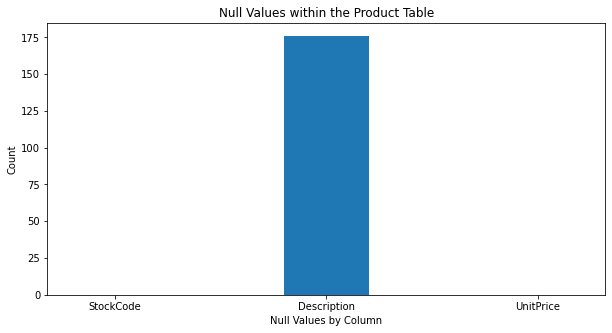

In [20]:
# Patrick 

# Execute the query to count nulls in each column in the product table
query = '''
    SELECT
        SUM(CASE WHEN StockCode IS NULL THEN 1 ELSE 0 END) AS StockCode_Nulls,
        SUM(CASE WHEN Description IS NULL THEN 1 ELSE 0 END) AS Description_Nulls,
        SUM(CASE WHEN UnitPrice IS NULL THEN 1 ELSE 0 END) AS UnitPrice_Nulls
    FROM
        product;
'''

c.execute(query)

# Fetch the result
result = c.fetchone()

# Print the count of nulls in each column
data = {'StockCode' : result[0],
        'Description' : result[1],
        'UnitPrice' : result[2]
       }
columns = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(columns, values, width = 0.4)
plt.xlabel('Null Values by Column')
plt.ylabel('Count')
plt.title('Null Values within the Product Table')
plt.show()


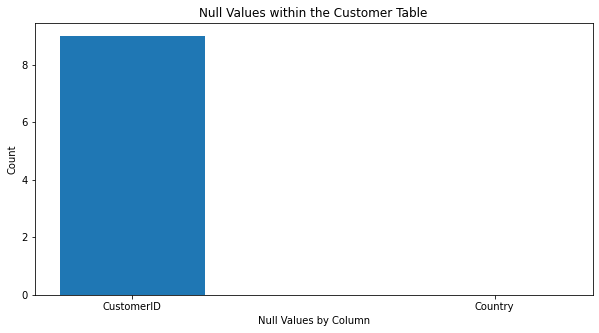

In [21]:
# Patrick 

# Execute the query to count nulls in each column in the customer table
query = '''
    SELECT
        SUM(CASE WHEN CustomerID IS NULL THEN 1 ELSE 0 END) AS CustomerID_Nulls,
        SUM(CASE WHEN Country IS NULL THEN 1 ELSE 0 END) AS Country_Nulls
    FROM
        customer;
'''

c.execute(query)

# Fetch the result
result = c.fetchone()

# Print the count of nulls in each column
data = {'CustomerID' : result[0],
        'Country' : result[1]
       }
columns = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(columns, values, width = 0.4)
plt.xlabel('Null Values by Column')
plt.ylabel('Count')
plt.title('Null Values within the Customer Table')
plt.show()

In [22]:
# Joseph

# Total Number of Transactions
c.execute("SELECT COUNT(InvoiceNo) AS TotalTransactions FROM transactions")

# Fetch the result
result = c.fetchone()
total_transactions = result[0]
print("The total number of transactions are:", total_transactions)


The total number of transactions are: 25900


In [23]:
# Joseph

# Total Number of Customers
c.execute("SELECT COUNT(DISTINCT CustomerID) AS TotalCustomers FROM customer")

# Fetch the result
result = c.fetchone()
total_customers = result[0]
print("The total number of customers are:", total_customers)


The total number of customers are: 4372


In [24]:
# Joseph

# Distinct countries who made a purchase
c.execute("SELECT DISTINCT Country AS UniqueCountry FROM customer")

# Fetch the results
results = c.fetchall()

# Extract the unique countries from the results
unique_countries = [row[0] for row in results]

# Print the distinct countries
print("Distinct countries who made a purchase:")
for country in unique_countries:
    print(country)

Distinct countries who made a purchase:
United Kingdom
France
Australia
Netherlands
Germany
Norway
EIRE
Switzerland
Spain
Poland
Portugal
Italy
Belgium
Lithuania
Japan
Iceland
Channel Islands
Denmark
Cyprus
Sweden
Austria
Israel
Finland
Bahrain
Greece
Hong Kong
Singapore
Lebanon
United Arab Emirates
Saudi Arabia
Czech Republic
Canada
Unspecified
Brazil
USA
European Community
Malta
RSA


In [25]:
# Joseph

# Total Number of Products
c.execute("SELECT COUNT(DISTINCT Description) AS TotalUniqueProducts FROM product")

# Fetch the result
result = c.fetchone()
total_unique_products = result[0]

# Print the total number of unique products
print("The total number of unique products is:", total_unique_products)



The total number of unique products is: 3753


In [26]:
# Olusina 

# Set the locale for currency formatting
#locale.setlocale(locale.LC_ALL, '')

# Select the total sales for each country
c.execute('''SELECT Country, SUM(Quantity * UnitPrice) AS TotalSales
             FROM transactions
             JOIN product ON transactions.StockCode = product.StockCode
             JOIN customer ON transactions.CustomerID = customer.CustomerID
             GROUP BY Country''')

# Get the column names
columns = [description[0] for description in c.description]

# Fetch all the results
results = c.fetchall()

# Create a DataFrame with the results and column names
df = pd.DataFrame(results, columns=columns)

df['TotalSales'] = df['TotalSales'].map(locale.currency)

# Print the DataFrame
print(df)

                 Country  TotalSales
0              Australia    $8514.58
1                Austria     $915.46
2                Bahrain      $72.46
3                Belgium    $2534.58
4                 Brazil     $175.20
5                 Canada     $722.28
6        Channel Islands    $1296.28
7                 Cyprus     $728.89
8         Czech Republic    ($64.41)
9                Denmark    $1344.35
10                  EIRE   $15711.23
11    European Community     $100.47
12               Finland    $2964.95
13                France   $14514.37
14               Germany   $15904.60
15                Greece     $146.70
16               Iceland     $213.56
17                Israel      $22.66
18                 Italy     $744.52
19                 Japan   $10869.14
20               Lebanon      $30.12
21             Lithuania     $120.12
22                 Malta     $141.02
23           Netherlands   $21978.42
24                Norway    $1010.85
25                Poland     $690.25
2

In [27]:
# Olusina 

# top-selling products based on the quantity sold

c.execute('''SELECT p.StockCode, p.Description, SUM(t.Quantity) AS TotalQuantitySold
             FROM transactions AS t
             JOIN product AS p ON t.StockCode = p.StockCode
             GROUP BY p.StockCode, p.Description
             ORDER BY TotalQuantitySold DESC''')

# Get the column names
columns = [description[0] for description in c.description]

# Fetch all the results
results = c.fetchall()

# Create a DataFrame with the results and column names
df = pd.DataFrame(results, columns=columns)

# Print the DataFrame
print(df)

     StockCode                          Description  TotalQuantitySold
0        22197                 SMALL POPCORN HOLDER              19203
1       85123A   WHITE HANGING HEART T-LIGHT HOLDER              14322
2        23084                   RABBIT NIGHT LIGHT              13043
3        84826       ASSTD DESIGN 3D PAPER STICKERS              12480
4        16014          SMALL CHINESE STYLE SCISSOR              12005
...        ...                                  ...                ...
3253    79323W                  WHITE CHERRY LIGHTS              -4838
3254    72140F                           throw away              -5368
3255     84347  ROTATING SILVER ANGELS T-LIGHT HLDR              -7796
3256     23003     TRAVEL CARD WALLET VINTAGE ROSE               -9058
3257     23005     TRAVEL CARD WALLET I LOVE LONDON             -18952

[3258 rows x 3 columns]


In [28]:
# Olusina 

# Calculate the revenue generated by each customer

c.execute('''SELECT customer.CustomerID, customer.Country, SUM(transactions.Quantity * product.UnitPrice) AS Revenue
             FROM transactions
             JOIN product ON transactions.StockCode = product.StockCode
             JOIN customer ON transactions.CustomerID = customer.CustomerID
             GROUP BY customer.CustomerID, customer.Country''')

# Get the column names
columns = [description[0] for description in c.description]

# Fetch all the results
results = c.fetchall()

# Create a DataFrame with the results and column names
df = pd.DataFrame(results, columns=columns)

df['Revenue'] = df['Revenue'].map(locale.currency)

# Print the DataFrame
print(df)

      CustomerID         Country  Revenue
0          12346  United Kingdom    $0.00
1          12347         Iceland  $213.56
2          12348         Finland  $331.36
3          12349           Italy   $15.00
4          12350          Norway   $50.52
...          ...             ...      ...
4367       18280  United Kingdom   $19.35
4368       18281  United Kingdom   $10.20
4369       18282  United Kingdom   $24.12
4370       18283  United Kingdom   $85.07
4371       18287  United Kingdom  $132.12

[4372 rows x 3 columns]


In [29]:
# Olusina

# Determine the monthly sales trend

c.execute('''SELECT strftime('%Y-%m', InvoiceDate) AS Month, SUM(Quantity * UnitPrice) AS MonthlySales
             FROM transactions
             JOIN product ON transactions.StockCode = product.StockCode
             GROUP BY Month
             ORDER BY Month''')

# Get the column names
columns = [description[0] for description in c.description]

# Fetch all the results
results = c.fetchall()

# Create a DataFrame with the results and column names
df = pd.DataFrame(results, columns=columns)

df['MonthlySales'] = df['MonthlySales'].map(locale.currency)

# Print the DataFrame
print(df)

  Month MonthlySales
0  None  $1395486.86


In [30]:
# Olusina

# Identify the most active customers (based on the number of invoices)

c.execute('''SELECT CustomerID, COUNT(DISTINCT InvoiceNo) AS NumInvoices
             FROM transactions
             GROUP BY CustomerID
             ORDER BY NumInvoices DESC''')
# Get the column names
columns = [description[0] for description in c.description]

# Fetch all the results
results = c.fetchall()

# Create a DataFrame with the results and column names
df = pd.DataFrame(results, columns=columns)

# Print the DataFrame
print(df)

      CustomerID  NumInvoices
0            NaN         3710
1        14911.0          248
2        12748.0          224
3        17841.0          169
4        14606.0          128
...          ...          ...
4368     12355.0            1
4369     12354.0            1
4370     12353.0            1
4371     12350.0            1
4372     12349.0            1

[4373 rows x 2 columns]


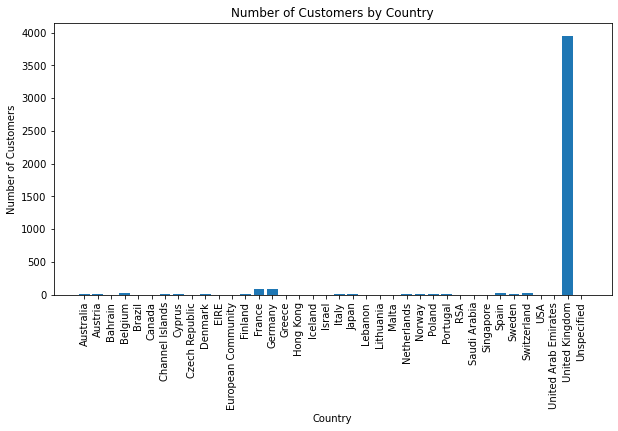

In [31]:
# Patrick

# Execute the SQL query to get the number of customers by country
query = '''
    SELECT Country, COUNT(CustomerID) AS NumCustomers
    FROM customer
    GROUP BY Country
'''

c.execute(query)

# Fetch the query results
results = c.fetchall()

# Extract the country names and corresponding customer counts
countries = [row[0] for row in results]
customer_counts = [row[1] for row in results]

fig = plt.figure(figsize = (10, 5))
plt.bar(countries, customer_counts)
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Country')
plt.xticks(rotation=90)
plt.show()

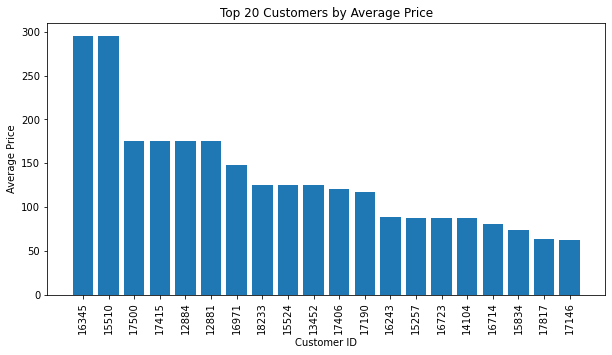

In [32]:
# Patrick

# Top 20 Customers by Average Price

# Execute the SQL query to calculate the average price per customer
query = '''
    SELECT t.CustomerID, AVG(p.UnitPrice) AS AvgPrice
    FROM transactions AS t
    JOIN product AS p ON t.StockCode = p.StockCode
    GROUP BY t.CustomerID
    ORDER BY AvgPrice DESC
    LIMIT 20
'''

c.execute(query)

# Fetch the query results
results = c.fetchall()

# Extract the customer IDs and average price data
customer_ids = [str(row[0]) for row in results]
avg_prices = [row[1] for row in results]

fig = plt.figure(figsize = (10, 5))
plt.bar(customer_ids, avg_prices)
plt.xlabel('Customer ID')
plt.ylabel('Average Price')
plt.title('Top 20 Customers by Average Price')
plt.xticks(rotation=90)
plt.show()

In [33]:
# Joseph

# Number of Units Sold per Customer

# Execute the SQL query
c.execute("SELECT CustomerID, SUM(Quantity) AS TotalUnitsSold FROM transactions GROUP BY CustomerID ORDER BY CustomerID")

# Fetch the results
results = c.fetchall()

# Initialize lists to store the valid results
customer_ids = []
total_units_sold = []

# Process the results, handling NULL values
for row in results:
    customer_id = row[0]
    units_sold = row[1]
    
    # Skip the row if CustomerID or Quantity is NULL
    if customer_id is None or units_sold is None:
        continue
    
    customer_ids.append(customer_id)
    total_units_sold.append(units_sold)

# Print the result
print("CustomerID | Total Units Sold")
print("-----------------------------")
for customer_id, units_sold in zip(customer_ids, total_units_sold):
    print(f"{customer_id:<10} | {units_sold}")


CustomerID | Total Units Sold
-----------------------------
12346      | 0
12347      | 100
12348      | 416
12349      | 2
12350      | 12
12352      | 25
12353      | 2
12354      | 10
12355      | 24
12356      | 74
12357      | 12
12358      | 28
12359      | 20
12360      | 28
12361      | 12
12362      | 71
12363      | 26
12364      | 41
12365      | 12
12367      | 12
12370      | 366
12371      | 21
12372      | 60
12373      | 10
12374      | 9
12375      | 27
12377      | 20
12378      | 6
12379      | 21
12380      | 73
12381      | 13
12383      | 93
12384      | 15
12386      | 104
12388      | 228
12390      | 4
12391      | 1
12393      | 34
12394      | 44
12395      | 100
12397      | 7
12398      | 12
12399      | 196
12401      | 3
12402      | 10
12403      | 39
12405      | 6
12406      | 29
12407      | 424
12408      | 46
12409      | 139
12410      | 3
12412      | 28
12413      | 8
12414      | 60
12415      | 2243
12417      | 77
12418      | 24
12420      | 

17373      | 58
17374      | 6
17375      | 1
17376      | 8
17377      | 108
17379      | 1
17381      | 6211
17382      | 24
17383      | 1
17384      | 3
17385      | 12
17386      | 258
17387      | 8
17388      | 722
17389      | 873
17391      | 288
17392      | 2
17394      | 1
17396      | 580
17397      | 3
17398      | 18
17400      | 53
17402      | 327
17403      | 4
17404      | 2315
17405      | 26
17406      | 18
17408      | 1
17409      | 7
17410      | 50
17411      | 18
17412      | 86
17414      | 740
17415      | 2
17416      | 193
17418      | 32
17419      | 69
17420      | 13
17422      | 121
17423      | -32
17425      | 40
17426      | 55
17427      | 24
17428      | 1059
17429      | 59
17430      | 36
17431      | 9
17432      | 5
17433      | 1
17434      | 59
17436      | 30
17438      | 5
17440      | 177
17442      | 47
17443      | 504
17444      | 37
17446      | 48
17447      | 18
17448      | -1
17449      | 53
17450      | 8252
17451      | 68
17453

Top 10 Products Sold in the UK:
StockCode | Description | Total Units Sold
------------------------------------------
22197      | SMALL POPCORN HOLDER | 19114
84826      | ASSTD DESIGN 3D PAPER STICKERS | 12480
16014      | SMALL CHINESE STYLE SCISSOR | 12005
85123A     | WHITE HANGING HEART T-LIGHT HOLDER | 10287
84077      | WORLD WAR 2 GLIDERS ASSTD DESIGNS | 7200
22693      | GROW A FLYTRAP OR SUNFLOWER IN TIN | 6216
85099B     | JUMBO BAG RED RETROSPOT | 5807
18007      | ESSENTIAL BALM 3.5g TIN IN ENVELOPE | 5586
17003      | BROCADE RING PURSE  | 5374
21787      | RAIN PONCHO RETROSPOT | 4697


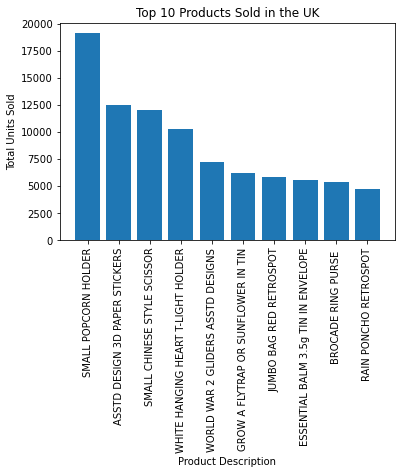

In [34]:
# Joseph

# Top 10 Most Popular Items Sold in the United Kingdom

# Execute the SQL query
c.execute("""
    SELECT t.StockCode, p.Description, SUM(t.Quantity) AS TotalUnitsSold
    FROM transactions AS t
    JOIN product AS p ON t.StockCode = p.StockCode
    JOIN customer AS c ON t.CustomerID = c.CustomerID
    WHERE c.Country = 'United Kingdom'
    GROUP BY t.StockCode, p.Description
    ORDER BY TotalUnitsSold DESC
    LIMIT 10
""")

# Fetch the results
results = c.fetchall()

# Extract the StockCode, Description, and TotalUnitsSold from the results
stock_codes = [row[0] for row in results]
descriptions = [row[1] for row in results]
total_units_sold = [row[2] for row in results]

# Print the top 10 products sold in the UK
print("Top 10 Products Sold in the UK:")
print("StockCode | Description | Total Units Sold")
print("------------------------------------------")
for stock_code, description, units_sold in zip(stock_codes, descriptions, total_units_sold):
    print(f"{stock_code:<10} | {description:<12} | {units_sold}")

# Visualize the result
plt.bar(descriptions, total_units_sold)
plt.xlabel('Product Description')
plt.ylabel('Total Units Sold')
plt.title('Top 10 Products Sold in the UK')
plt.xticks(rotation=90)
plt.show()

In [35]:
# Joseph

# Total Spend per Customer

# Execute the SQL query
c.execute("""
    SELECT t.CustomerID, SUM((t.Quantity * p.UnitPrice)) as TotalSpend
    FROM transactions AS t
    JOIN product AS p ON t.StockCode = p.StockCode
    GROUP BY t.CustomerID
""")

# Fetch the results
results = c.fetchall()

# Initialize lists to store the valid results
customer_ids = []
total_spend = []

# Process the results, handling None values
for row in results:
    customer_id = row[0]
    spend = row[1]

    # Skip the row if CustomerID or TotalSpend is None
    if customer_id is None or spend is None:
        continue

    customer_ids.append(customer_id)
    total_spend.append(spend)

# Print the result
print("CustomerID | Total Spend")
print("------------------------")
for customer_id, spend in zip(customer_ids, total_spend):
    print(f"{customer_id:<10} | {spend}")


CustomerID | Total Spend
------------------------
12346      | 0.0
12347      | 213.56
12348      | 331.36
12349      | 15.0
12350      | 50.519999999999996
12352      | 99.55
12353      | 42.46
12354      | 20.8
12355      | 30.0
12356      | 167.10000000000002
12357      | 19.799999999999997
12358      | 133.8
12359      | 41.4
12360      | 46.3
12361      | 23.4
12362      | 194.71
12363      | 85.26
12364      | 90.7
12365      | 15.0
12367      | 19.919999999999998
12370      | 486.58
12371      | 167.04
12372      | 90.11999999999999
12373      | 19.5
12374      | 13.049999999999999
12375      | 67.05
12377      | 53.8
12378      | 25.259999999999998
12379      | 109.95
12380      | 237.25
12381      | 96.15
12383      | 96.94999999999999
12384      | 31.85
12386      | 98.0
12388      | 179.88
12390      | 19.8
12391      | 5.91
12393      | 69.6
12394      | 181.8
12395      | 179.42
12397      | 29.75
12398      | 15.0
12399      | 123.64
12401      | 17.85
12402      | 19.5
1

13396      | 98.63999999999999
13397      | 503.02
13398      | 9.959999999999999
13402      | 34.85
13403      | 15.0
13404      | 32.34
13405      | 87.72
13408      | 4479.32
13410      | 183.95
13411      | 18.75
13414      | 514.65
13416      | 89.7
13417      | 41.2
13418      | 164.32
13419      | 10.5
13420      | 14.700000000000001
13421      | 55.7
13422      | -11.549999999999999
13425      | 24.18
13426      | 318.24
13427      | 85.5
13428      | 0.65
13429      | 105.3
13430      | 42.66
13431      | 50.92
13434      | 222.6
13435      | 206.69
13436      | 7.5
13437      | 131.58
13439      | 6.5
13441      | 12.600000000000001
13447      | 60.16
13448      | 1.110000000000003
13449      | 20.4
13450      | 107.52
13451      | -11.679999999999993
13452      | 250
13453      | 98.02000000000001
13455      | 19.179999999999996
13456      | 568.4200000000001
13458      | 473.38999999999993
13460      | 22.98
13461      | 250.1
13462      | 11.55
13464      | 10.5
13466     

18185      | 25.259999999999998
18188      | 88.77000000000001
18189      | 26.4
18190      | 23.65
18191      | 60.839999999999996
18192      | 16.5
18193      | -40.989999999999995
18194      | 211.6
18196      | 5.0
18198      | 2211.85
18200      | 5.95
18202      | 106.56
18203      | 4.95
18204      | 38.14
18205      | 40.79
18209      | 17.85
18210      | 227.62
18211      | 68.69999999999999
18212      | 19.9
18213      | 15.0
18215      | 23.6
18216      | 17.0
18217      | 46.6
18218      | 326.1
18219      | 213.21
18220      | 174.98
18221      | 111.78
18222      | 40.56
18223      | 294.26
18224      | 19.919999999999998
18225      | 237.97
18226      | 312.25
18227      | 15.0
18228      | 46.53
18229      | 2054.2799999999997
18230      | 231.84
18231      | 92.38000000000001
18232      | 61.2
18233      | 500
18235      | 38.28
18236      | 184.73000000000002
18237      | 109.88999999999999
18239      | 103.80000000000001
18240      | 357.0
18241      | 391.11
18242  

Top 20 Products Sold:
Description | Total Units Sold
-----------------------------------
SMALL POPCORN HOLDER | 19203
WHITE HANGING HEART T-LIGHT HOLDER | 14322
RABBIT NIGHT LIGHT | 13043
ASSTD DESIGN 3D PAPER STICKERS | 12480
SMALL CHINESE STYLE SCISSOR | 12005
WORLD WAR 2 GLIDERS ASSTD DESIGNS | 8448
GROW A FLYTRAP OR SUNFLOWER IN TIN | 6240
JUMBO BAG RED RETROSPOT | 5850
BROCADE RING PURSE  | 5414
RAIN PONCHO RETROSPOT | 4769
PAPER CHAIN KIT 50'S CHRISTMAS  | 4708
ANTIQUE SILVER TEA GLASS ETCHED | 4600
TRAVEL CARD WALLET KEEP CALM | 4347
VICTORIAN GLASS HANGING T-LIGHT | 4341
BLACK RECORD COVER FRAME | 4245
PACK OF 12 LONDON TISSUES  | 4069
EMPIRE DESIGN ROSETTE | 3975
ASSORTED COLOUR BIRD ORNAMENT | 3831
CHILLI LIGHTS | 3744


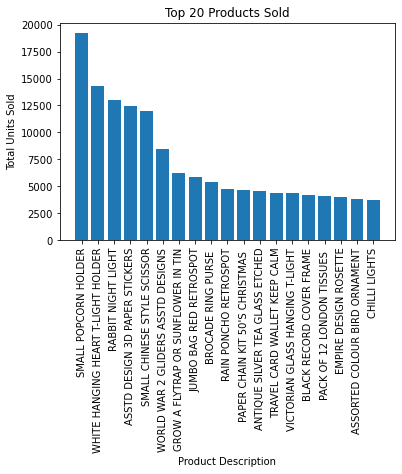

In [36]:
# Joseph

# Top 20 Products Sold

# Execute the SQL query
c.execute("""
    SELECT p.Description, SUM(t.Quantity) AS TotalUnitsSold
    FROM transactions AS t
    JOIN product AS p ON t.StockCode = p.StockCode
    GROUP BY p.Description
    ORDER BY TotalUnitsSold DESC
    LIMIT 20
""")

# Fetch the results
results = c.fetchall()

# Initialize lists to store the valid results
descriptions = []
total_units_sold = []

# Process the results, handling None values
for row in results:
    description = row[0]
    units_sold = row[1]

    # Skip the row if Description or TotalUnitsSold is None
    if description is None or units_sold is None:
        continue

    descriptions.append(description)
    total_units_sold.append(units_sold)

# Print the top 20 products sold
print("Top 20 Products Sold:")
print("Description | Total Units Sold")
print("-----------------------------------")
for description, units_sold in zip(descriptions, total_units_sold):
    print(f"{description:<12} | {units_sold}")

# Visualize the result
plt.bar(descriptions, total_units_sold)
plt.xlabel('Product Description')
plt.ylabel('Total Units Sold')
plt.title('Top 20 Products Sold')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Commit the changes and close the connection
conn.commit()
conn.close()